In [10]:
!pip3 install numpy
!pip3 install nltk
!pip3 install matplotlib

In [11]:
import math
import numpy as np
import string
import json
import os
import sys
import nltk
import random
from nltk.corpus import stopwords

from matplotlib import pyplot as plt

from nltk.tokenize import word_tokenize

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/vicotrbb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vicotrbb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
chars = ''
maxlen = 60
step = 3

In [6]:
print(np.__version__)
print(nltk.__version__)

1.18.5
3.5


In [5]:
# Fix seed's
os.environ['PYTHONHASHSEED']=str(66)
np.random.seed(66)
random.seed(66)

In [7]:
from collections import Mapping, Container
from sys import getsizeof
 
def deep_getsizeof(o, ids):
    d = deep_getsizeof
    if id(o) in ids:
        return 0
 
    r = getsizeof(o)
    ids.add(id(o))
 
    if isinstance(o, str):
        return r / 1048576
 
    if isinstance(o, Mapping):
        return (r + sum(d(k, ids) + d(v, ids) for k, v in o.iteritems())) / 1048576
 
    if isinstance(o, Container):
        return (r + sum(d(x, ids) for x in o)) / 1048576
    
    return r / 1048576

&lt;ipython-input-7-8cc4fbd0e1cc&gt;:1: DeprecationWarning: Using or importing the ABCs from &#39;collections&#39; instead of from &#39;collections.abc&#39; is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, Container


In [44]:
f = open('projects/wikipedia-nlp/wikipedia-content-dataset.json',)
data = json.load(f)

content = list(data[x] for x in data.keys())
text = ''

memory=[]
texts=[]

for p in np.arange(100, 250, 10):
    for c in content[:p]:
        for i in c:
            text += i

    tokens = word_tokenize(text)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    text = ''
    for c in words:
        text += c
        text += ' '
    text = text.strip()

    print(p, '  -  ', len(text))
    texts.append(text)
    memory.append(float("%.3f"%deep_getsizeof(text, set())))

100   -   219737
110   -   466685
120   -   786091
130   -   1119517
140   -   1477569
150   -   1858945
160   -   2267976
170   -   2691480
180   -   3148394
190   -   3621250
200   -   4114445
210   -   4631878
220   -   5182499
230   -   5756315
240   -   6348670


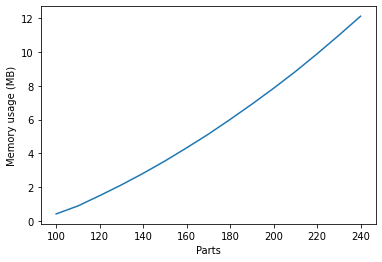

In [45]:
plt.plot(np.arange(100, 250, 10), memory)
plt.xlabel("Parts")
plt.ylabel("Memory usage (MB)")
plt.show()

In [27]:
sentences = []
next_chars = []

x_memory=[]
y_memory=[]

for text in texts:
    for i in range(0, len(text) - maxlen, step):
        sentences.append(text[i: i + maxlen])
        next_chars.append(text[i + maxlen])

    chars = sorted(list(set(text)))
    char_indices = dict((char, chars.index(char)) for char in chars)

    x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
    y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
    for i, sentence in enumerate(sentences):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[next_chars[i]]] = 1

    x_memory.append(float("%.3f"%deep_getsizeof(x, set())))
    y_memory.append(float("%.3f"%deep_getsizeof(y, set())))
    

MemoryError: Unable to allocate 7.43 GiB for an array with shape (863932, 60, 154) and data type bool

In [38]:
print('parts: ', np.arange(100, 250, 10))
print(memory)
print(x_memory)
print(y_memory)

[250 240 230 220 210 200 190 180 170 160 150 140 130 120 110]
[0.419, 0.89, 1.499, 2.135, 2.818, 3.546, 4.326, 5.134, 6.005, 6.907, 7.848, 8.835, 9.885, 10.979, 12.109]
[590.794, 1871.9, 4156.225]
[9.847, 31.198, 69.271]
